In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from pyspark.sql import SparkSession

from pyspark.sql import Row
from pyspark.sql import functions

from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.appName("Music Box feature consolidation").getOrCreate()

#### Load all the feaure tables

In [3]:
play_ft = spark.read.csv('./data/all_play_features/all_play_features.csv',header=True,inferSchema=True)

In [4]:
down_df = spark.read.csv('./data/all_down_features/all_down_features.csv',header=True,inferSchema=True)

In [6]:
search_df = spark.read.csv('./data/all_search_features/all_search_features.csv',header=True,inferSchema=True)

In [15]:
uid_label = spark.read.csv('./data/valid_uid_label_all/valid_uid_label_all.csv',header=True,inferSchema=True)

In [8]:
uid_label.count()

105351

In [9]:
play_ft.count()

105351

In [10]:
search_df.count()

96638

In [11]:
down_df.count()

87866

#### Combine 4 dataframes together

In [17]:
all_features_df = play_ft.join(down_df,   on =['uid'], how='left')\
                         .join(search_df, on =['uid'], how='left')\
                         .join(uid_label, on =['uid'], how='left')

In [18]:
all_features_df.columns

['uid',
 'play_times_last_3_days',
 'play_times_last_7_days',
 'play_times_last_14_days',
 'play_times_last_21_days',
 'play_times_last_30_days',
 'avg_playtime_last_3_days',
 'avg_playtime_last_7_days',
 'avg_playtime_last_14_days',
 'avg_playtime_last_21_days',
 'avg_playtime_last_30_days',
 'days_since_last_play',
 'download_times_last_3_days',
 'download_times_last_7_days',
 'download_times_last_14_days',
 'download_times_last_21_days',
 'download_times_last_30_days',
 'days_since_last_download',
 'search_times_last_3_days',
 'search_times_last_7_days',
 'search_times_last_14_days',
 'search_times_last_21_days',
 'search_times_last_30_days',
 'days_since_last_search',
 'Churn']

In [19]:
pd.DataFrame(all_features_df.take(20),columns=all_features_df.columns)

,uid,play_times_last_3_days,play_times_last_7_days,play_times_last_14_days,play_times_last_21_days,play_times_last_30_days,avg_playtime_last_3_days,avg_playtime_last_7_days,avg_playtime_last_14_days,avg_playtime_last_21_days,...,download_times_last_21_days,download_times_last_30_days,days_since_last_download,search_times_last_3_days,search_times_last_7_days,search_times_last_14_days,search_times_last_21_days,search_times_last_30_days,days_since_last_search,Churn
0,114363528.0,0,0,0,1,20,0.000000,0.000000,0.000000,5.000000,...,6.0,14.0,12.0,0.0,0.0,0.0,0.0,8.0,30.0,1
1,167920832.0,9,22,354,560,817,517.333333,484.571429,4783.285714,5169.476190,...,2.0,7.0,12.0,0.0,1.0,3.0,12.0,29.0,7.0,0
2,168573152.0,0,0,0,0,109,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,12.0,30.0,1
3,57077508.0,216,372,1020,1510,2388,8823.000000,7222.714286,9382.285714,9921.809524,...,4.0,4.0,13.0,0.0,4.0,13.0,20.0,21.0,5.0,0
4,157815664.0,0,81,182,184,233,0.000000,2289.000000,2337.071429,1562.619048,...,0.0,2.0,23.0,0.0,0.0,0.0,0.0,2.0,23.0,1
5,159183408.0,0,1,77,223,707,0.000000,17.714286,722.928571,1201.428571,...,0.0,1.0,30.0,0.0,2.0,2.0,3.0,9.0,6.0,0
6,168013072.0,28,28,37,72,174,1624.333333,696.142857,475.071429,455.571429,...,0.0,48.0,22.0,0.0,0.0,0.0,7.0,24.0,20.0,0
7,168155632.0,13,42,85,207,399,554.666667,1023.428571,1044.857143,1482.285714,...,18.0,29.0,12.0,0.0,0.0,2.0,7.0,33.0,11.0,0
8,168353024.0,73,114,1921,2262,2876,1418.333333,1761.714286,3723.642857,4903.333333,...,38.0,53.0,15.0,0.0,0.0,2.0,66.0,124.0,14.0,0
9,167614368.0,0,0,0,0,70,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


* NA means the user did not do any search or download in the past 30 days. fill in NA with 0.

In [24]:
all_features_df2=all_features_df.fillna(0)

In [25]:
#check 
all_features_df2.where(col('download_times_last_14_days').isNull()).count()

0

In [26]:
all_features_df3=all_features_df2.toPandas()

In [27]:
all_features_df3.head()

,uid,play_times_last_3_days,play_times_last_7_days,play_times_last_14_days,play_times_last_21_days,play_times_last_30_days,avg_playtime_last_3_days,avg_playtime_last_7_days,avg_playtime_last_14_days,avg_playtime_last_21_days,...,download_times_last_21_days,download_times_last_30_days,days_since_last_download,search_times_last_3_days,search_times_last_7_days,search_times_last_14_days,search_times_last_21_days,search_times_last_30_days,days_since_last_search,Churn
0,114363528.0,0,0,0,1,20,0.000000,0.000000,0.000000,5.000000,...,6,14,12,0,0,0,0,8,30,1
1,167920832.0,9,22,354,560,817,517.333333,484.571429,4783.285714,5169.476190,...,2,7,12,0,1,3,12,29,7,0
2,168573152.0,0,0,0,0,109,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,12,30,1
3,57077508.0,216,372,1020,1510,2388,8823.000000,7222.714286,9382.285714,9921.809524,...,4,4,13,0,4,13,20,21,5,0
4,157815664.0,0,81,182,184,233,0.000000,2289.000000,2337.071429,1562.619048,...,0,2,23,0,0,0,0,2,23,1


### Is recency features indicative of churn?

In [33]:
recency_ft= all_features_df3.groupby('Churn')['days_since_last_search','days_since_last_play','days_since_last_download'].sum()

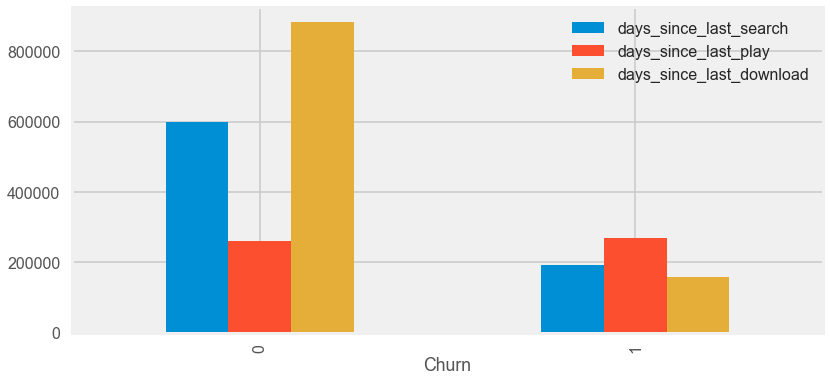

In [48]:
%matplotlib inline
plt.style.use('seaborn-poster')

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
recency_ft.plot(kind='bar',ax=ax)

> The longer the time interval since user last download and search, the more likely they churned. Play recency on the other hand, is not very indicative of churn

In [41]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


### Those who did not search or download in the past 30 days(download/search NA) are more likely to churn?

In [49]:
all_features_df_na= all_features_df.toPandas()

In [60]:
all_features_df_na.isnull().sum()

uid                                0
play_times_last_3_days             0
play_times_last_7_days             0
play_times_last_14_days            0
play_times_last_21_days            0
play_times_last_30_days            0
avg_playtime_last_3_days           0
avg_playtime_last_7_days           0
avg_playtime_last_14_days          0
avg_playtime_last_21_days          0
avg_playtime_last_30_days          0
days_since_last_play               0
download_times_last_3_days     17485
download_times_last_7_days     17485
download_times_last_14_days    17485
download_times_last_21_days    17485
download_times_last_30_days    17485
days_since_last_download       17485
search_times_last_3_days        9378
search_times_last_7_days        9378
search_times_last_14_days       9378
search_times_last_21_days       9378
search_times_last_30_days       9378
days_since_last_search          9378
Churn                              0
no_down_src                        0
dtype: int64

In [50]:
down_search_na= all_features_df_na.loc[all_features_df_na.isnull().sum(axis=1)>=1, 'Churn']

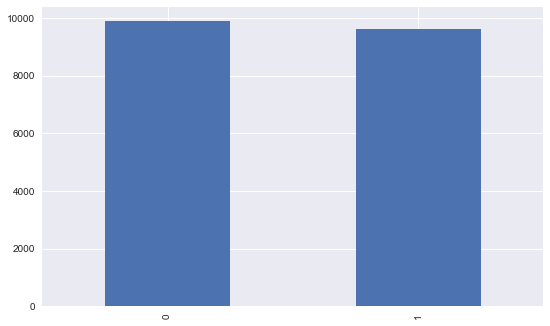

In [53]:
plt.style.use('seaborn')
down_search_na.value_counts().plot.bar() # no difference

#### How are those users play activities compare to other users with download and search activities?

In [99]:
all_features_df_na['no_down_src']=all_features_df_na['download_times_last_30_days'].apply(lambda x:"No" if  x==0 else 'Yes')

In [100]:
all_features_df_na['no_down_src'].loc[all_features_df_na.isnull().any(axis=1)]='No'

/Users/xueyiwen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [101]:
play_act_compare=all_features_df_na.groupby('no_down_src')['play_times_last_21_days','play_times_last_14_days','play_times_last_7_days'].mean()

In [102]:
play_act_compare

,play_times_last_21_days,play_times_last_14_days,play_times_last_7_days
no_down_src,,,
No,114.720324,68.625801,30.001947
Yes,472.390262,299.729903,134.777892


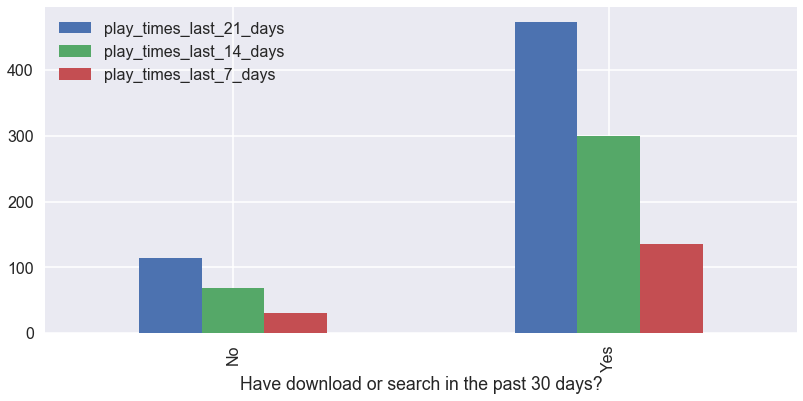

In [98]:
plt.style.use('seaborn-poster')

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
play_act_compare.plot(kind='bar',ax=ax)
plt.xlabel('Have download or search in the past 30 days?')

> Less download and search activities also indicates less play activity

### Can we tell if a user will churn 2 weeks in advance by looking at frequency features in the last 2 weeks?

In [103]:
frq_ft= all_features_df3.groupby('Churn')['play_times_last_14_days','download_times_last_14_days','search_times_last_14_days'].sum()

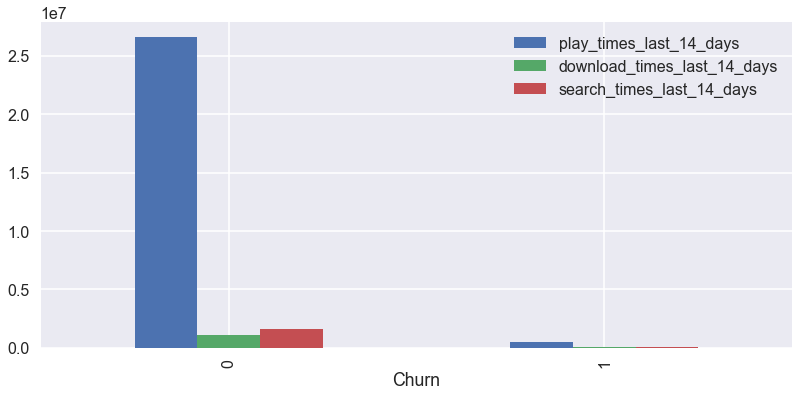

In [104]:

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
frq_ft.plot(kind='bar',ax=ax)

> play times for churn users are significantly lower than active users by looking at past 14 days behavior

### What's the distribution of average play per day?

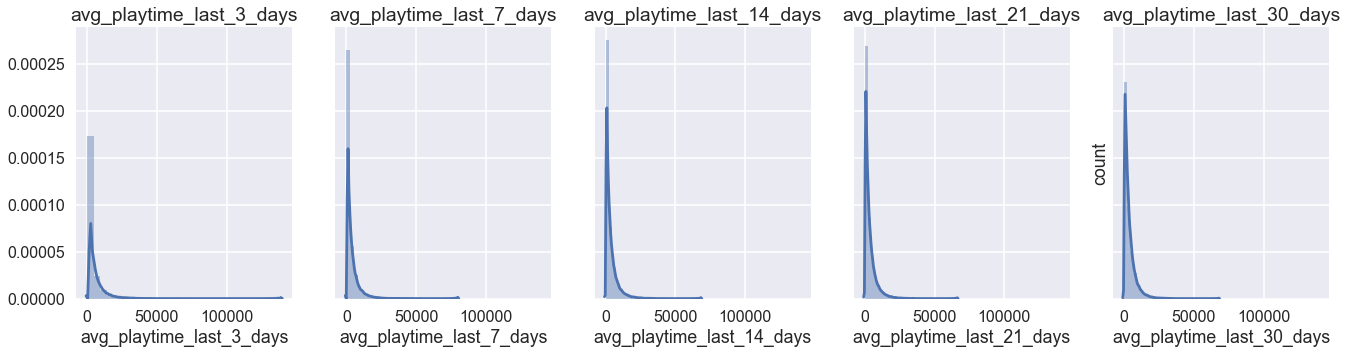

In [106]:
f, axs = plt.subplots(1,5, sharex = True, sharey=True, figsize = (20,5))
window_list=[3,7,14,21,30]
for w in window_list:
    i = window_list.index(w)
    colname = 'avg_playtime_last_' + str(w) + '_days'
    plt.xlabel("average play time")
    plt.ylabel('count')
    sns.distplot(all_features_df3[colname],ax = axs[i], bins = 30)

    axs[i].set_title(colname)


In [105]:
all_features_df3.to_csv('./data/all_features_label_combined.csv')